<a href="https://colab.research.google.com/github/soleildayana/Positional-Astronomy/blob/main/mars_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte Práctica Segundo Parcial de Astronomía de Posición

**Soleil Dayana Niño Murcia 1033097666**

*Mayo 2024*


Para correr el código por favor montar al colab el mars.csv.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
from google.colab import drive
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/mars.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/mars.csv'

In [ ]:
 #cortando columnas vacías
#renombrando las columnas por acomododf.drop([' ', ' .1', 'Unnamed: 5'], axis=1, inplace = True)
df = df.rename(columns = {" Date__(UT)__HR:MN": "Fecha y Hora", " R.A._(HH MM SS)": "Ascencion (h)", " DEC__(° ' '')": "Declinacion(°)" })

In [ ]:
#Se crea una columna con la fecha en el formato datetime para luego separar en distintas columnas año, mes y día como valores
df['Fecha'] = pd.to_datetime(df['Fecha y Hora'])
df['year'] = df['Fecha'].dt.year
df['month'] = df['Fecha'].dt.month
df['day'] = df['Fecha'].dt.day
df.loc[:, ['Fecha', 'Ascencion (h)', "Declinacion(°)"]]

,Fecha,Ascencion (h),Declinacion(°)
0,2018-01-01,14 46 58.07,-15 09 25.8
1,2018-01-06,14 59 18.71,-16 05 26.8
2,2018-01-11,15 11 44.74,-16 58 42.1
3,2018-01-16,15 24 15.75,-17 49 01.5
4,2018-01-21,15 36 51.25,-18 36 15.1
...,...,...,...
288,2021-12-11,15 43 08.42,-19 37 45.2
289,2021-12-16,15 57 37.44,-20 25 24.8
290,2021-12-21,16 12 19.06,-21 08 45.9
291,2021-12-26,16 27 13.05,-21 47 32.6


# a.) Fecha Juliana y Tiempo Sideral en Greenwich.

La fecha juliana es crucial en astronomía moderna porque ofrece un sistema de tiempo uniforme y continuo que facilita la precisión en las observaciones, los cálculos y la investigación histórica relacionada con eventos celestes. Por otro lado, el TSG es el ángulo horario del punto vernal en Greenwich, que indica el tiempo transcurrido desde que el punto vernal cruzó el meridiano de Greenwich. Es esencial para determinar la posición de los astros en un momento dado.

Para encontrar la fecha juliana y el TSG de cada observación, se aplicaron los métodos del libro de Astronomía de Posición de Portilla (2009).

Además, en la base de datos se puede notar que todas las observaciones son hechas a las 00:00 UTC, es por esto, que el TSG es igual al TSG0.

In [ ]:
J2000 = 2451545 #Fecha juliana del 01-01-2000 00:00 UTC
f = 1.0027379 #factor de conversión
E = 23 +(26/60) #Inclinación entre la eclíptica y el ecuador celeste

def find_JD(A, M, D): #Función que calcula la Fecha Juliana, siguiendo el Portilla (2009)
  if M==2 or M==1:
    M+= 12
    A-=1
  JD = np.floor(365.25*(A+4716))+np.floor(30.6001*(M+1))-np.floor(A/100)+np.floor(np.floor(A/100)/4)+D-1522.5
  return JD

def Paso_a_1er_Reloj(time): #Función para hacer el Paso al Primer Reloj
  if -24 < time < 0:
   time = time + 24
  else:
    time = time - np.floor(time/24)*24
  return time

def primer_reloj_TSG0(time): #Función para hacer el Paso al Primer Reloj del TSG
  if time < 0:
    time = time - np.floor(time/24)*24
  else:
    time = time - np.floor(time/24)*24
  return time

def find_TSG(JD, J2000, f): #Función que calcula el TSG, siguiendo el Portilla (2009)
  T_= (JD- J2000)/36525
  T = Paso_a_1er_Reloj(T_)
  TSG0 = (24110.54841 + 8640184.813 * T + 0.09310 * T **2)/3600 #Note que todas las observaciones son hechas a las 00:00 UTC, así  que TSG0=TSG
  TSG = Paso_a_1er_Reloj(TSG0)
  return TSG

def hours_to_grades(h, m ,s): #Función que convierte las horas en grados
  hour_dec = h + m/60 + s/3600
  grades = hour_dec*360/24
  return grades

In [ ]:
JD_, TSG_, A_R_ = [], [] , [] #Se crean listas vacías para agregar los nuevos valores
for index, row in df.iterrows():
  JD = find_JD(row.year, row.month, row.day) #En un ciclo for se llaman las funciones con sus respectivos argumentos
  TSG = find_TSG(JD, J2000, f)
  JD_.append(JD)
  TSG_.append(TSG)
  h = float(df["Ascencion (h)"][index][1:3]) #Para convertir la ascención en grados separo cada string en hora, minutos, segundos y luego de convertirlos a flotantes, se llama la función para convertirlos, y se agrega a la lista vacía creada previamente
  m = float(df["Ascencion (h)"][index][4:7])
  s = float(df["Ascencion (h)"][index][7:12])
  A_R = hours_to_grades(h,m,s)
  A_R_.append(A_R)
df['Fecha Juliana'] = JD_  #Se crean nuevas columnas en el dataframe con los valores de las nuevas listas
df['TSG'] = TSG_
df['Ascención (°)'] = A_R_

Aquí se expone finalmente cada observación con su respectiva fecha juliana y tiempo sideral en Greenwich.

In [ ]:
df.loc[:, ['Fecha y Hora', 'Fecha Juliana', 'TSG']]

,Fecha y Hora,Fecha Juliana,TSG
0,2018-Jan-01 00:00,2458119.5,6.706616
1,2018-Jan-06 00:00,2458124.5,7.035165
2,2018-Jan-11 00:00,2458129.5,7.363714
3,2018-Jan-16 00:00,2458134.5,7.692263
4,2018-Jan-21 00:00,2458139.5,8.020813
...,...,...,...
288,2021-Dec-11 00:00,2459559.5,5.328764
289,2021-Dec-16 00:00,2459564.5,5.657313
290,2021-Dec-21 00:00,2459569.5,5.985862
291,2021-Dec-26 00:00,2459574.5,6.314411


# b.) Calcule las **coordenadas eclípticas de Marte** de cada observación. Realice por separados gráficos de ascención recta, declinación, longitud y latitud eclíptica contra el tiempo. Discuta sobre lo observado y lo que esperaba observar.

In [ ]:
#Función que transforma coordenadas ecuatoriales a eclípticas siguiendo el método del libro de Portilla (2009)
def from_ecuatorial_to_ecliptical (decl, ar, E):
  a = np.sin(np.radians(decl))*np.cos(np.radians(E))
  b = np.cos(np.radians(decl))*np.sin(np.radians(ar))*np.sin(np.radians(E))
  lat_ecl = np.degrees(np.arcsin(a-b))
  p = np.sin(np.radians(decl))*np.sin(np.radians(E)) + np.cos(np.radians(decl))* np.cos(np.radians(E))*np.sin(np.radians(ar))
  q = np.cos(np.radians(decl))*np.cos(np.radians(ar))
  long_ecl = np.degrees(np.arctan(p/q))
  if p*q<0 and q<0:
    long_ecl += 180
  elif p*q<0 and q>0:
    long_ecl += 360
  elif p+q<0:
    long_ecl += 180
  else:
   long_ecl = long_ecl
  return lat_ecl, long_ecl

In [ ]:
longitud_ecl, latitud_ecl, decl_dec = [], [], [] #Se crean listas vacías para agregar los nuevos valores

for index, row in df.iterrows():
  gr = float(df["Declinacion(°)"][index][0:4]) #Se separan los strings de la declinación para convertirla de formato (° ' ") a grados decimales
  m = float(df["Declinacion(°)"][index][5:7])
  s = float(df["Declinacion(°)"][index][8:12])
  sign = '-'
  if df["Declinacion(°)"][index][1] == sign: #Esto es para tener en cuenta que si se encuentra el signo menos en los grados, los minutos y segundos no se deben sumar sino restar
    decl_h = gr - m/60 - s/3600
  else:
    decl_h = gr + m/60 + s/3600
  decl_dec.append(decl_h)
  A_R = df['Ascención (°)'][index] #Se nombra la columna como una variable para poder llamarla en la función
  lat_ecl, long_ecl = from_ecuatorial_to_ecliptical(decl_h, A_R, E) #Se llama la función que convierte las coordenadas
  longitud_ecl.append(long_ecl) #Se agregan los valores a las listas vacías
  latitud_ecl.append(lat_ecl)

df['Declinación decimal (°)'] = decl_dec #Se crean nuevas columnas en el dataframe con los valores de las nuevas listas (Declinación convertida a decimal y coordenadas eclípticas)
df['Longitud Ecliptica (°)'] = longitud_ecl
df['Latitud Ecliptica (°)'] = latitud_ecl

Aquí se puede observar cómo ya hemos registrado en el dataframe las coordenadas eclípticas asociadas a cada observación.

In [ ]:
df.loc[:, ['Fecha y Hora', 'Declinación decimal (°)', 'Ascención (°)','Latitud Ecliptica (°)', 'Longitud Ecliptica (°)']]

,Fecha y Hora,Declinación decimal (°),Ascención (°),Latitud Ecliptica (°),Longitud Ecliptica (°)
0,2018-Jan-01 00:00,-15.157167,221.741958,0.896943,223.922219
1,2018-Jan-06 00:00,-16.090778,224.827958,0.863691,227.037510
2,2018-Jan-11 00:00,-16.978361,227.936417,0.827676,230.146871
3,2018-Jan-16 00:00,-17.817083,231.065625,0.788615,233.248476
4,2018-Jan-21 00:00,-18.604194,234.213542,0.746384,236.340509
...,...,...,...,...,...
288,2021-Dec-11 00:00,-19.629222,235.785083,0.087094,238.020081
289,2021-Dec-16 00:00,-20.423556,239.406000,0.035934,241.513089
290,2021-Dec-21 00:00,-21.146083,243.079417,-0.016245,245.022128
291,2021-Dec-26 00:00,-21.792389,246.804375,-0.069507,248.547854


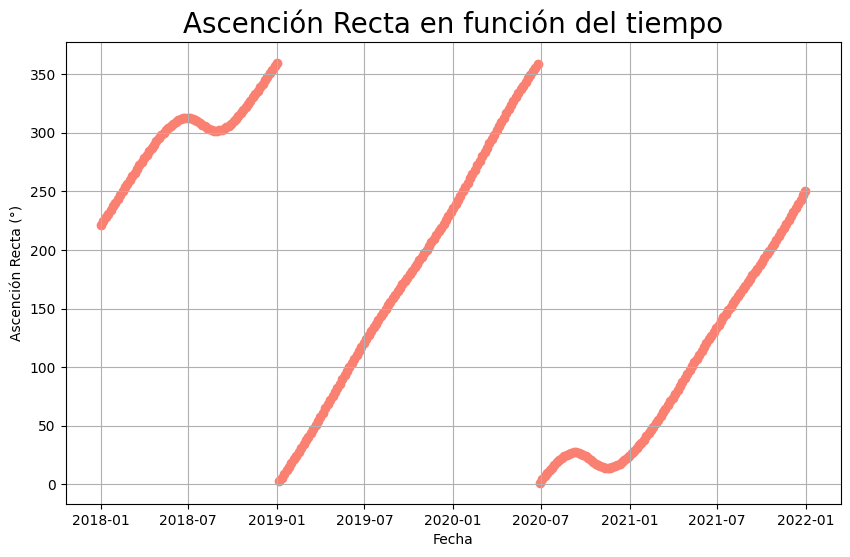

In [ ]:
x = df['Fecha']
y = df['Ascención (°)']

plt.figure(figsize=(10, 6))

plt.xlabel('Fecha')
plt.ylabel('Ascención Recta (°)')
plt.title('Ascención Recta en función del tiempo', y=1, fontdict={'fontsize':20})
plt.grid(True)

plt.scatter(x,y, color='salmon')

La ascensión recta de Marte no aumenta linealmente de 0 a 360° como se podría esperar intuitivamente. En cambio, se observan dos "valles" en la gráfica, que corresponden a los periodos de retrogradación del planeta.
Se esperaría un aumento más o menos lineal de la ascensión recta con el tiempo, ya que Marte se mueve en su órbita alrededor del Sol. Sin embargo, debido al movimiento relativo de la Tierra y Marte, se produce el fenómeno de la retrogradación, que causa esos "valles" en la gráfica.

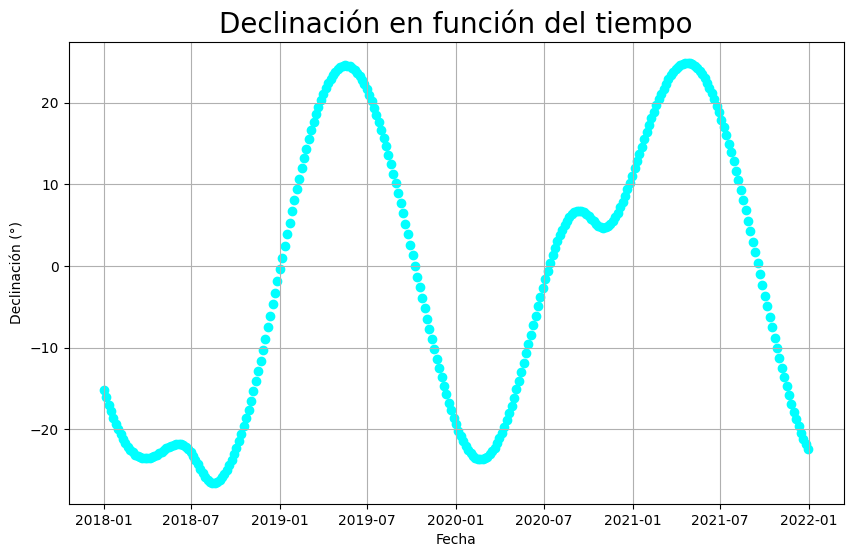

In [ ]:
x = df['Fecha']
y = df['Declinación decimal (°)']

plt.figure(figsize=(10, 6))

plt.xlabel('Fecha')
plt.ylabel('Declinación (°)')
plt.title('Declinación en función del tiempo', y=1, fontdict={'fontsize':20})
plt.grid(True)

plt.scatter(x,y, color ='cyan')

La declinación de Marte oscila entre valores positivos y negativos, mostrando un patrón cíclico. Oscila de las -24h a las 24h, donde las 24h equivalen a 90°, es por esto que la gráfica no aumenta "linealmente" como la ascención recta, sino una vez que llega a uno de los polos celestes, regresa a cero.
Teniendo únicamente eso en cuenta, se esperaría que la gráfica tuviese un comportamiento senosoidal; sin embargo, al igual que en el caso de la ascención recta, se observan dos "valles", en exactamente las mismas fechas.

Este comportamiento es esperado, ya que la declinación de un planeta varía a lo largo de su órbita debido a la inclinación de su plano orbital respecto al ecuador celeste pero sobretodo en su periodo de retrogradación.

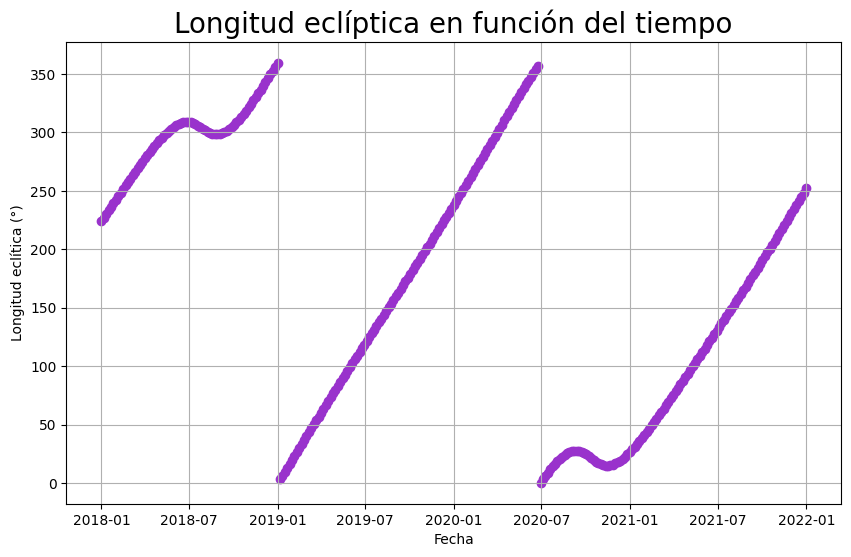

In [ ]:
x = df['Fecha']
y = df['Longitud Ecliptica (°)']

plt.figure(figsize=(10, 6))

plt.xlabel('Fecha')
plt.ylabel('Longitud eclítica (°)')
plt.title('Longitud eclíptica en función del tiempo',  y=1, fontdict={'fontsize':20})
plt.grid(True)

plt.scatter(x,y, color='#9932CC')

La ascensión recta y la longitud eclíptica, aunque medidas en sistemas de coordenadas diferentes, están relacionadas de forma estrecha. Ambas coordenadas indican la posición de un objeto en la esfera celeste en una dirección "este-oeste". La ascensión recta se mide a lo largo del ecuador celeste, mientras que la longitud eclíptica se mide a lo largo de la eclíptica.

Dado que la órbita de Marte está cerca del plano de la eclíptica, las variaciones en su posición "este-oeste" se reflejan de forma similar tanto en la ascensión recta como en la longitud eclíptica. Por lo tanto, las gráficas de estas dos coordenadas muestran patrones similares, incluyendo los periodos de retrogradación.

Sin embargo, es importante notar que no son exactamente iguales. Las diferencias se deben a la inclinación del plano orbital de Marte respecto al ecuador celeste, lo que causa pequeñas variaciones entre las dos coordenadas.

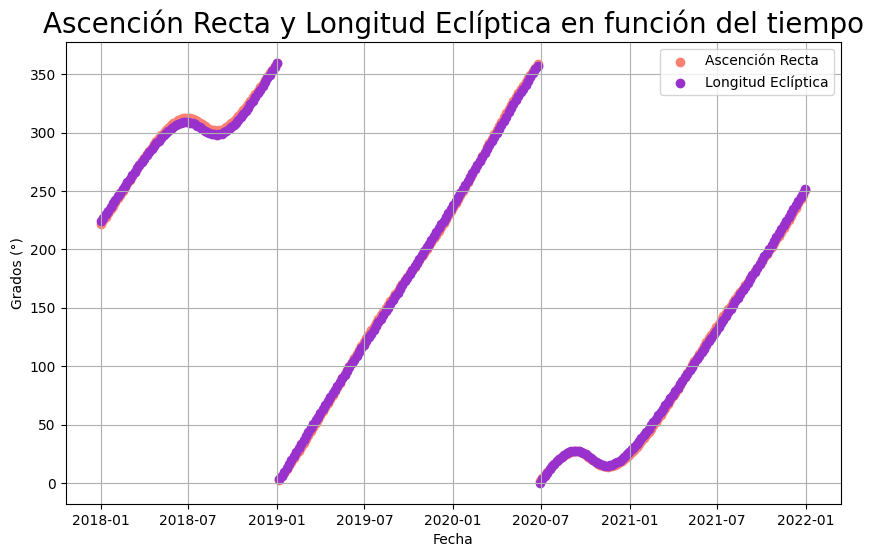

In [ ]:
x = df['Fecha']
y1 = df['Ascención (°)']
y2 = df['Longitud Ecliptica (°)']

plt.figure(figsize=(10, 6))

plt.xlabel('Fecha')
plt.ylabel('Grados (°)')
plt.title('Ascención Recta y Longitud Eclíptica en función del tiempo',  y=1, fontdict={'fontsize':20})
plt.grid(True)

plt.scatter(x,y1, color='salmon', label='Ascención Recta')
plt.scatter(x,y2, color='#9932CC', label='Longitud Eclíptica')
plt.legend()

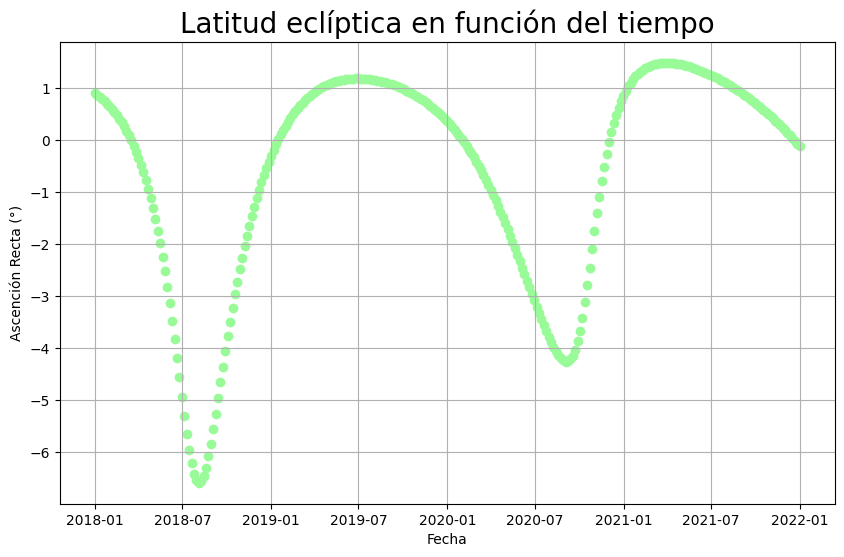

In [ ]:
x = df['Fecha']
y = df['Latitud Ecliptica (°)']

plt.figure(figsize=(10, 6))

plt.xlabel('Fecha')
plt.ylabel('Ascención Recta (°)')
plt.title('Latitud eclíptica en función del tiempo',  y=1, fontdict={'fontsize':20})
plt.grid(True)

plt.scatter(x,y, color='#98FB98')

La latitud eclíptica de Marte oscila entre -6° y 1° debido a la inclinación de su órbita respecto al plano de la eclíptica. Aunque la órbita de Marte está cerca de la eclíptica, no está perfectamente alineada con ella. Esta pequeña inclinación hace que Marte se mueva ligeramente "arriba" y "abajo" del plano de la eclíptica a lo largo de su órbita, lo que se refleja en las variaciones de su latitud eclíptica.

El rango de variación de la latitud eclíptica de Marte está determinado por la inclinación de su órbita, que es de aproximadamente 1.85°. Esta inclinación es relativamente pequeña en comparación con otros planetas del sistema solar, lo que explica por qué la latitud eclíptica de Marte se mantiene cerca de cero.

Se esperaría que la latitud eclíptica se mantuviera relativamente constante, ya que la órbita de Marte está cerca del plano de la eclíptica. Sin embargo, tiene pequeñas variaciones, se ven dos picos respectivos a cada periodo de retrogradación.

# **c.)** Identifique en los gráficos los momentos en que el planeta se encuentra en retrogradación, ¿Cuántas veces estuvo Marte en retrogradación durante las observaciones? ¿Cuánto duró cada retrogradación?


En las gráficas de las coordenadas de Marte, se observan dos notorias inflexiones, alrededor de agosto de 2018 y diciembre de 2020. Estas desviaciones en la trayectoria aparente del planeta indican periodos de retrogradación. Por lo tanto, podemos afirmar que Marte experimentó dos retrogradaciones durante el periodo de observación (2018-2021).

Para estimar la duración de cada retrogradación, identifiquemos los puntos en que el planeta parece empezar a tener un retroceso en el valor de sus coordenadas y vuelve a avanzar.

En la siguiente tabla, usted puede observar cómo las coordenadas aumentan hasta 2018-06-30 (index 36); es en este punto, en que las coordenadas empiezan a disminuir y comienza el primer periodo de retrogradación. Luego, es aproximadamente en 2018-10-08 (index 56) que vuelve al mismo punto en que comenzó la retrogradación.

La siguiente tabla presenta el segundo periodo de retrogradación, donde se evidencia una progresión usual de las coordenadas hasta el 2020-09-12 (index 197); a partir de este punto, inicia una retrogradación que parece terminar entre el 5 y el 10 de enero de 2021 (index 220)

Hallemos la diferencia de las fechas julianas de estos momentos clave para hacer una estimación de la duración de cada retrogradación.

In [ ]:
diferencias = [] #Lista para almacenar las diferencias de fechas julianas

start_index = None #Variables para rastrear el inicio y el final del período de disminución
end_index = None

for index, row in df.iterrows():
    if index > 0:
        # Verificar si la ascensión recta está disminuyendo
        if df['Ascención (°)'][index] < df['Ascención (°)'][index - 1]:
            if start_index is None:
                start_index = index - 1  # Marcar el inicio del período de disminución
        elif start_index is not None:
            end_index = index  # Marcar el final del período de disminución
            # Calcular la diferencia de fechas julianas
            start_jd = df['Fecha Juliana'][start_index]
            end_jd = df['Fecha Juliana'][end_index]
            difference = end_jd - start_jd
            # Guardar la diferencia en la lista e imprimirla
            if difference > 10:
                print("Se observó una retrogradación de Marte; duración de ", difference, "días.")
                diferencias.append(difference)
            # Reiniciar las variables para el próximo período
            start_index = None
            end_index = None
if diferencias: # Calcular el promedio de las diferencias
    periodo = sum(diferencias) / len(diferencias)
    num_retrogradaciones = len(diferencias)
    print("Marte estuvo en retrogradación", num_retrogradaciones, "veces durante las observaciones.")
    print("La retrogradación de Marte tiene un periodo promedio de", periodo, "días.")

Se observó una retrogradación de Marte; duración de  65.0 días.
Se observó una retrogradación de Marte; duración de  70.0 días.
Marte estuvo en retrogradación 2 veces durante las observaciones.
La retrogradación de Marte tiene un periodo promedio de 67.5 días.


# **d.)** Estime el periodo sinódico del Planeta y, a partir de este, el periodo sideral. Luego, use la Tercera Ley de Kepler para calcular el semieje mayor de su órbita. Compare sus resultados con los reportados en la literatura, ¿qué tanto difieren?

Sabemos que el periodo sinódico de un planeta está definido por el intervalo de tiempo que hay entre dos conjunciones similares del planeta con el Sol, visto desde la Tierra. En el caso de un planeta exterior, como lo es Marte, el período sinódico es el tiempo entre dos oposiciones sucesivas, cuando el planeta y el Sol están en lados opuestos de la Tierra.

Ahora, la retrogradación de Marte está directamente relacionada con su período sinódico. Pues durante la oposición de Marte, que es cuando está en el lado opuesto del Sol desde la Tierra, Marte exhibe retrogradación. Es por esto, que identificando los puntos de oposición de Marte en las observaciones; es decir, los puntos más bajos de las pequeñas curvas que representan cada retrogradación, es posible estimar su periodo sinódico P.

In [ ]:
# Calcula la diferencia en la ascención recta
df['diff_AR'] = df['Ascención (°)'].diff()

# Crea una lista para almacenar los periodos de retrogradación
retrograde_periods = []
start_index = None
dias_disminuyendo = 0

for index, diff in enumerate(df['diff_AR']): # Itera sobre las diferencias en la ascensión recta
  if diff < 0:
    if start_index is None:
      start_index = index
    days_decreasing += 1
  else:
    if start_index is not None and days_decreasing > 10:
      end_index = index
      retrograde_periods.append((start_index, end_index))
    start_index = None
    days_decreasing = 0

# Encuentra el índice del valor más bajo en cada periodo de retrogradación
min_indices = []
for start, end in retrograde_periods: # Itera sobre los índices de inicio y fin de cada periodo de retrogradación
  min_index = df['Ascención (°)'][start:end].idxmin()
  min_indices.append(min_index)

print("Índices de las observaciones con valores más bajos en AR en cada periodo de retrogradación:", min_indices)

Índices de las observaciones con valores más bajos en AR en cada periodo de retrogradación: [48, 210]


In [ ]:
# Extraer las fechas julianas correspondientes a los índices
fechas_julianas = df['Fecha Juliana'][min_indices].tolist()

P = [float(fechas_julianas[i+1] - fechas_julianas[i]) for i in range(len(fechas_julianas) - 1)] # Calcula los intervalos de tiempo entre cada fecha
P = float(sum(P)/len(P)) #convertir P de lista a float
print('El periodo sinódico estimado de Marte es de ~', P, 'días.')

El periodo sinódico estimado de Marte es de ~ 810.0 días.


Se obtuvo un periodo sinódico de 810 días, el valor real es de 780 días. Así, el porcentaje de error relativo es aproximadamente 3.21%.

En el libro de astronomía de Posición de Portilla (2009), se deduce y demuestra la siguiente igualdad para planetas exteriores como Marte, donde se relaciona el periodo orbital terrestre (Tt) con el periodo sinódico del planeta (P) y su periodo sideral (Tp). Esta será utilizada para deducir el periodo sideral de Marte, a partir de su periodo sinódico.

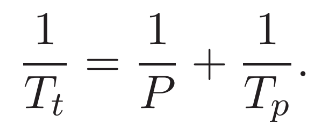

In [ ]:
Tt = 365.25 # Periodo orbital terrestre
# Despejando el periodo sideral: Tp = (1/Tt - 1/P)^-1
dif = 1/Tt - 1/P
Tp = round(dif**-1) # aproximamos al entero más cercano el valor del periodo sinódico del planeta
print('El periodo sideral de Marte estimado es de ', Tp, ' días.')

El periodo sideral de Marte estimado es de  665  días.


Se obtuvo que el periodo sideral de Marte es de 665 días, el valor real es de 686 días. Así, el porcentaje de error relativo es aproximadamente 2.54%.

In [ ]:
P_years = P/365.25 #Periodo sinódico de Marte en años
a = P_years**2/3 #Aplicando la Tercera Ley de Kepler, el semieje mayor es igual a la raíz cúbica del periodo orbital elevado al cuadrado
print('El semieje mayor de la órbita de Marte es de ~', f"{a:.2f}", "UA.")

El semieje mayor de la órbita de Marte es de ~ 1.64 UA.


El código arroja que el semieje mayor de la órbita de Marte es de ~1.64 UA, el valor real de 1.5 UA. Por lo tanto, el porcentaje de error relativo es de 8%.

# **e.)** Proponga un sistema de coordenadas celestes basado en el plano orbital de Marte y deduzca las ecuaciones de transformación entre este y el sistema de coordenadas eclípticas.

Observe los detalles del sistema de coordenadas marcianas planteado y la deducción para la transformación de este a coordenadas eclípticas en el PDF adjunto en la entrega de la tarea en Classroom.

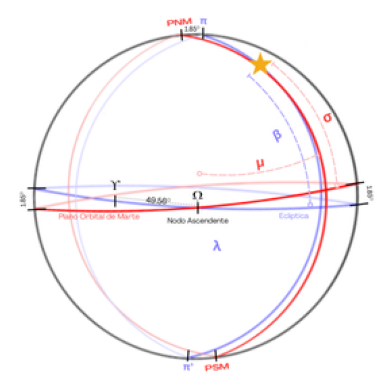

In [ ]:
img = mpimg.imread('/content/Sistema coordenado Marte.png')
plt.imshow(img)
plt.axis('off')
plt.show()

# f.) (Opcional) Implemente la transformación a este sistema para cada una de las observaciones.



In [ ]:
def from_eclipticaltomars ( lat_ecl, long_ecl): #Función que aplica la transformación deducida anteriormente
  arg = np.cos(np.radians(1.85))*np.sin(np.radians(lat_ecl)) + np.sin(np.radians(1.85))*np.cos(np.radians(lat_ecl))*np.cos(np.radians(long_ecl + 40.44))
  sigma = np.degrees(np.arcsin(arg)) #latitud marciana (σ)
  p_ = np.sin(np.radians(lat_ecl)) - np.cos(np.radians(1.85))*np.sin(np.radians(sigma))
  q_ = np.sin(np.radians(1.85))*np.cos(np.radians(sigma))
  mu = np.degrees(np.cos(p_/q_)) #longitud marciana (µ)
  return sigma, mu

In [ ]:
long_ec_list = df["Longitud Ecliptica (°)"].tolist() #convertimos las columnas respectivas a las coordenadas elípticas a listas
lat_ec_list = df["Latitud Ecliptica (°)"].tolist()

# Aplica la función a cada par de elementos y guarda los resultados en las listas de forma separada
sigma_list, mu_list = zip(*df.apply(lambda row: from_eclipticaltomars(row['Latitud Ecliptica (°)'], row['Longitud Ecliptica (°)']), axis=1))

# Asigna los resultados de vuelta al dataframe
df['Sigma (°)'] = sigma_list
df['Mu (°)'] = mu_list

In [ ]:
df

,Fecha y Hora,Ascencion (h),Declinacion(°),Fecha,year,month,day,Fecha Juliana,TSG,Ascención (°),Declinación decimal (°),Longitud Ecliptica (°),Latitud Ecliptica (°),diff_AR,Sigma (°),Mu (°)
0,2018-Jan-01 00:00,14 46 58.07,-15 09 25.8,2018-01-01,2018,1,1,2458119.5,6.706616,221.741958,-15.157167,223.922219,0.896943,NaN,0.714768,57.016990
1,2018-Jan-06 00:00,14 59 18.71,-16 05 26.8,2018-01-06,2018,1,6,2458124.5,7.035165,224.827958,-16.090778,227.037510,0.863691,3.086000,0.781834,57.239124
2,2018-Jan-11 00:00,15 11 44.74,-16 58 42.1,2018-01-11,2018,1,11,2458129.5,7.363714,227.936417,-16.978361,230.146871,0.827676,3.108458,0.846191,57.293044
3,2018-Jan-16 00:00,15 24 15.75,-17 49 01.5,2018-01-16,2018,1,16,2458134.5,7.692263,231.065625,-17.817083,233.248476,0.788615,3.129208,0.907199,57.179006
4,2018-Jan-21 00:00,15 36 51.25,-18 36 15.1,2018-01-21,2018,1,21,2458139.5,8.020813,234.213542,-18.604194,236.340509,0.746384,3.147917,0.964386,56.900105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,2021-Dec-11 00:00,15 43 08.42,-19 37 45.2,2021-12-11,2021,12,11,2459559.5,5.328764,235.785083,-19.629222,238.020081,0.087094,3.568083,0.359176,56.677864
289,2021-Dec-16 00:00,15 57 37.44,-20 25 24.8,2021-12-16,2021,12,16,2459564.5,5.657313,239.406000,-20.423556,241.513089,0.035934,3.620917,0.419008,56.072764
290,2021-Dec-21 00:00,16 12 19.06,-21 08 45.9,2021-12-21,2021,12,21,2459569.5,5.985862,243.079417,-21.146083,245.022128,-0.016245,3.673417,0.476896,55.273446
291,2021-Dec-26 00:00,16 27 13.05,-21 47 32.6,2021-12-26,2021,12,26,2459574.5,6.314411,246.804375,-21.792389,248.547854,-0.069507,3.724958,0.532362,54.291792


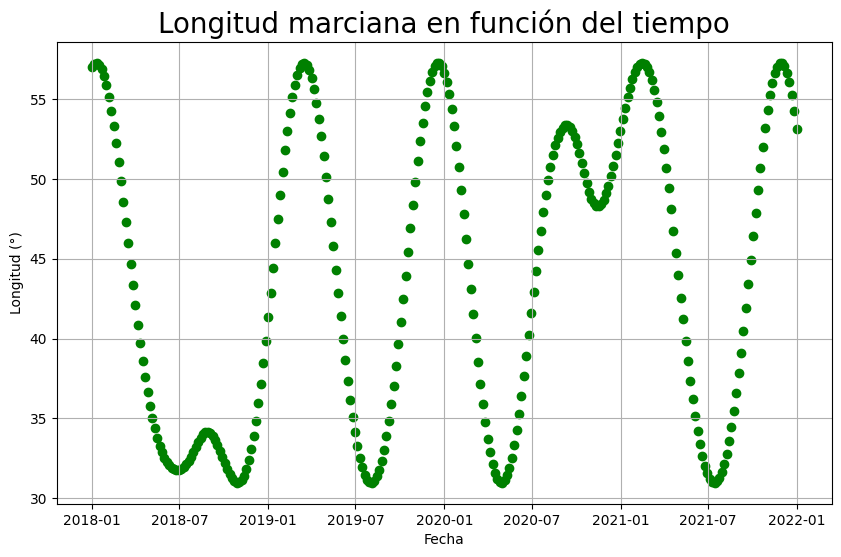

In [ ]:
x = df['Fecha']
y = df['Mu (°)']

plt.figure(figsize=(10, 6))

plt.xlabel('Fecha')
plt.ylabel('Longitud (°)')
plt.title('Longitud marciana en función del tiempo',  y=1, fontdict={'fontsize':20})
plt.grid(True)

plt.scatter(x,y, color='green')

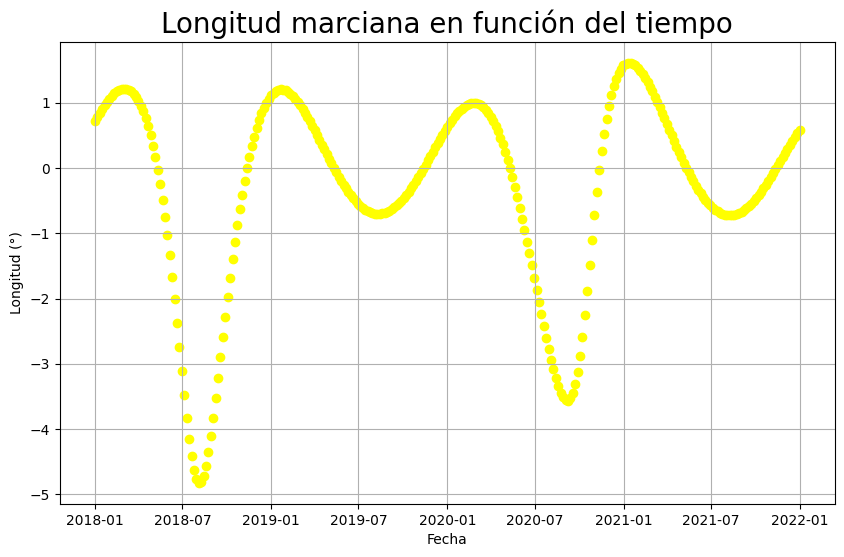

In [ ]:
x = df['Fecha']
y = df['Sigma (°)']

plt.figure(figsize=(10, 6))

plt.xlabel('Fecha')
plt.ylabel('Longitud (°)')
plt.title('Longitud marciana en función del tiempo',  y=1, fontdict={'fontsize':20})
plt.grid(True)

plt.scatter(x,y, color='yellow')

Al graficar en nuestro nuevo sistema de coordenadas marcianas, se evidencia que siguen una progresión senosoidal, lo cual tiene sentido por la forma en que se miden estas coordenadas; esto se cumple a excepción de los periodos de retrogradación, al igual que en todas las gráficas anteriores.